In [13]:
import pickle
from random import randint
import string
import re
import math
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
import spacy

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim import corpora, models, similarities, matutils

from wordcloud import WordCloud

# # libraries for visualization
# import pyLDAvis
# import pyLDAvis.gensim
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [14]:
# load doc into memory
def load_doc(filename):
    file = open(filename,'r')
    text = file.read()
    file.close()
    return text

In [15]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [16]:
def seperate_verses(corpus):  
    split_corpus = corpus.split('\n')
    return split_corpus

In [129]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]'% re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens 
              if word.isalpha()]
    
    # make lower case
    tokens = [word.lower() for word in tokens]
    
    return tokens

In [130]:
def clean_corpus(corpus):
#     corpus = seperate_verses(corpus)
    cleaned_corpus = []
    for i in range(len(corpus)):
        cleaned_doc = clean_doc(corpus[i])
        cleaned_corpus.append(cleaned_doc)
        
    return cleaned_corpus

In [19]:
def corpus_docs_list_to_str(corpus):
    new_corpus = []
    for i in range(len(corpus)):
        new_doc = ' '.join(corpus[i])
        new_corpus.append(new_doc)
        
    return new_corpus

In [20]:
def corpus_to_tokens_to_sequences(corpus,sequence_length=50):
    tokens = ' '.join(corpus)
    tokens = tokens.split()
    # organize into sequences of tokens
    length = sequence_length + 1
    sequences = []
    for i in range(length, len(tokens)):
        # select sequence of tokens
        seq = tokens[i-length:i]
        # convert into a line
        line = ' '.join(seq)
        # store
        sequences.append(line)
    print('Total Sequences: %d' % len(sequences))
    return sequences

## Data Cleaning

In [21]:
# Opening file as bytes due to non-ascii character
with open('Tanakh1917.txt') as f:
    tanakh = f.read()
# tanach = str(torah)

In [33]:
tanakh_book_titles = [x for x in tanakh[:375].split('\n')[1:-1] if x != '']

In [35]:
torah_book_titles = tanakh_book_titles[:5]

In [53]:
tanakh = tanakh[464:]

In [58]:
torah = tanakh[tanakh.index('In'):tanakh.index('JOSHUA')]

In [109]:
def split_corpus_into_verses(corpus):
    split_corpus = []
    prev_ix=0
    for ix, char in enumerate(corpus):
        if char in ['0','1','2','3','4','5','6','7','8','9']:
            split_corpus.append(corpus[prev_ix:ix])
            prev_ix = ix
    return split_corpus

In [110]:
split_corpus_into_verses(torah)

['In the beginning God created the\nheaven and the earth. ',
 '2Now the\nearth was unformed and void, and\ndarkness was upon the face of the\ndeep; and the spirit of God hovered\nover the face of the waters. ',
 '3And God\nsaid: ‘Let there be light.’ And there\nwas light. ',
 '4And God saw the light, that\nit was good; and God divided the light\nfrom the darkness. ',
 '5And God called\nthe light Day, and the darkness He\ncalled Night. And there was evening\nand there was morning, one day.\n',
 '6\nAnd God said: ‘Let there be a\nfirmament in the midst of the waters,\nand let it divide the waters from the\nwaters.’ ',
 '7And God made the\nfirmament, and divided the waters\nwhich were under the firmament from\nthe waters which were above the\nfirmament; and it was so. ',
 '8And God\ncalled the firmament Heaven. And\nthere was evening and there was\nmorning, a second day.\n',
 '9\nAnd God said: ‘Let the waters\nunder the heaven be gathered together\nunto one place, and let the dry land\nap

In [145]:
# Clean entire torah
clean_torah = clean_corpus(split_corpus_into_verses(torah))

clean_torah = [verse for verse in clean_torah if verse != []]

In [150]:
# Converting verses from lists to strings
clean_torah = corpus_docs_list_to_str(clean_torah)

In [151]:
# Export clean torah
out_filename = 'clean_torah.txt'
save_doc(clean_torah, out_filename)

In [152]:
# saving torahament sequences to txt file
torah_sequences = corpus_to_tokens_to_sequences(clean_torah)
out_filename = 'torah_sequences.txt'
save_doc(torah_sequences, out_filename)

Total Sequences: 150182


## NLP Preprocessing

In [155]:
def tokenize_corpus(corpus):
    tokenized_corpus = []
    for verse in corpus:
        tokenized_corpus.append(word_tokenize(verse))
    return tokenized_corpus        

In [172]:
extra_stopwords = common_words

In [201]:
def remove_stopwords(corpus):
    stop_words = stopwords.words('english')
    stop_words.extend(extra_stopwords)
    new_corpus = []
    for verse in corpus:
        new_verse = []
        for word in verse:
            if word not in stop_words:
                new_verse.append(word)
        new_corpus.append(new_verse)
    return new_corpus

In [160]:
def stemming_corpus(corpus):
    stemmed_corpus = []
    stemmer= PorterStemmer()
    for verse in corpus:
        stemmed_corpus.append([stemmer.stem(word) for word in verse])
    return stemmed_corpus

In [161]:
def lemmatize_corpus(corpus):
    lemmatized_corpus = []
    lemmatizer=WordNetLemmatizer()
    for verse in corpus:
        lemmatized_corpus.append([lemmatizer.lemmatize(word) for word in verse])
    return lemmatized_corpus

In [202]:
### Preprocessing Torah

# Tokenizing 
tokenized_torah = tokenize_corpus(clean_torah)

# Removing Stop Words 
tokenized_nostop_torah = remove_stopwords(tokenized_torah)

#Stemming and Lemmatizing
torah_stemmed = stemming_corpus(tokenized_nostop_torah)
torah_lemmatized = lemmatize_corpus(tokenized_nostop_torah)

## Exploratory Data Analysis

In [163]:
def join_tokenized_words(corpus):
    
    all_words = []
    for verse in corpus:
        joined_verse = ' '.join(verse)
        all_words.append(joined_verse)
    
    return all_words

In [164]:
def join_tokenized_verses(corpus):
    
    all_words = join_tokenized_words(corpus)
    all_words = ' '.join(all_words)
    all_words = all_words.split()
    
    return all_words

In [170]:
# function to plot most frequent terms
def freq_words(corpus, terms=30):
    
    fdist = FreqDist(corpus)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
    return list(d.word)

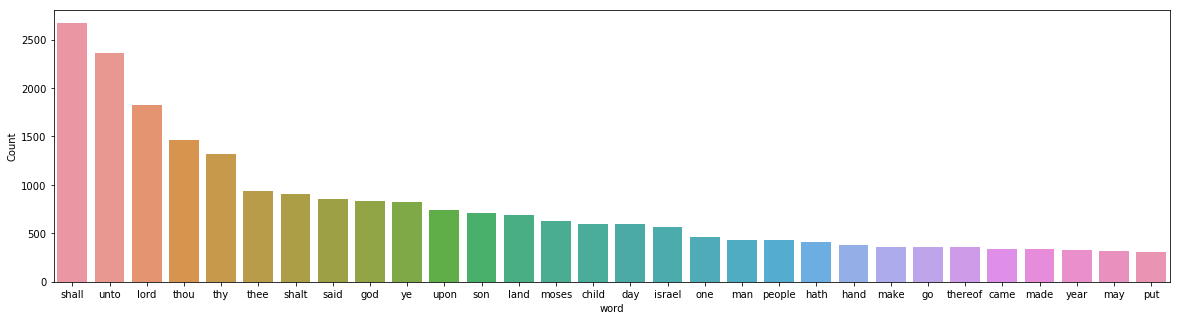

In [171]:
common_words = freq_words(join_tokenized_verses(torah_lemmatized))

In [173]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        colormap='seismic',
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12),dpi=300)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

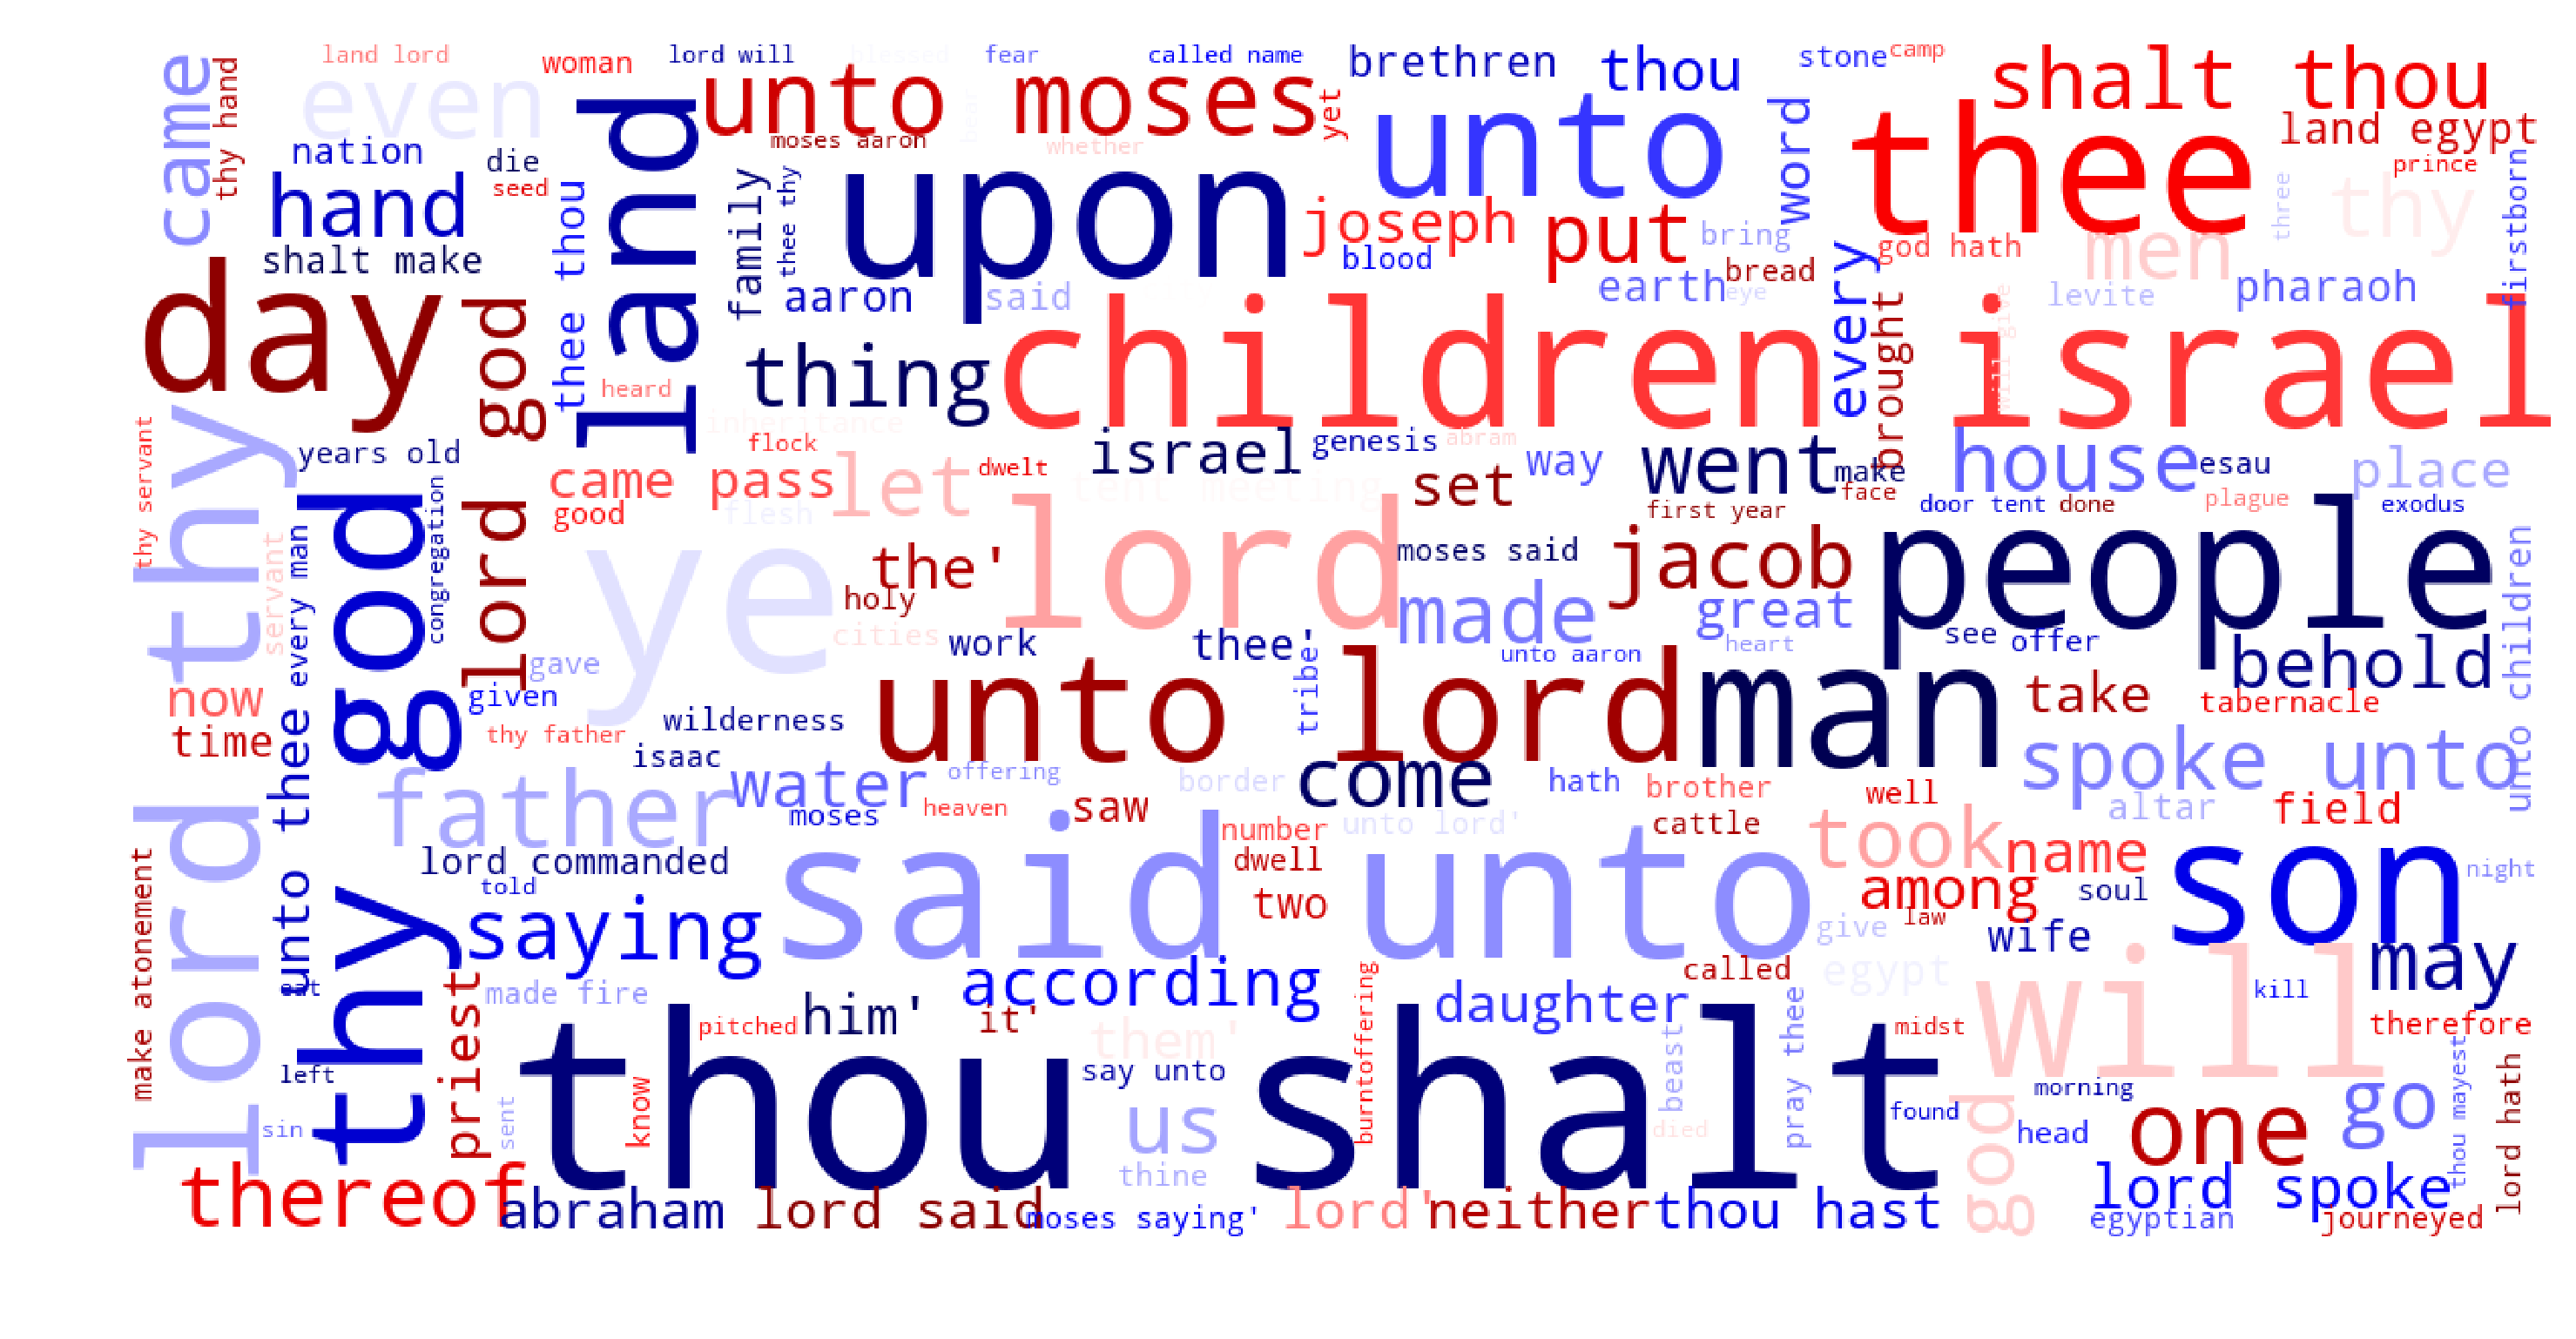

In [174]:
show_wordcloud(clean_torah)

## Model Preparation: Count Vectorization/ tf-idf

In [203]:
def display_topics(model, feature_names, no_top_words):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        topic_list.append(' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print('Topic %d:' % (topic_idx))
        print(topic_list[topic_idx])
    return topic_list

In [204]:
torah_lem_cv = CountVectorizer()
torah_lem_cv_sp_matrix = torah_lem_cv.fit_transform(join_tokenized_words(torah_lemmatized))

torah_lem_cv_df = pd.DataFrame(torah_lem_cv_sp_matrix.toarray(), columns=torah_lem_cv.get_feature_names())

In [205]:
torah_lem_tfidf = TfidfVectorizer()
torah_lem_tfidf_sp_matrix = torah_lem_tfidf.fit_transform(join_tokenized_words(torah_lemmatized))

In [206]:
avg_length = []
for verse in torah_lemmatized:
    avg_length.append(len(verse))

np.array(avg_length).mean()

8.515340442986053

## Topic Modeling
### LSA - Count Vectorizer

In [230]:
lsa = TruncatedSVD(10)
lsa_doc_topic = lsa.fit_transform(torah_lem_cv_sp_matrix)
lsa.explained_variance_ratio_

array([0.00764817, 0.0114875 , 0.01020604, 0.00937482, 0.00914644,
       0.00873785, 0.00790837, 0.00745681, 0.00721099, 0.00687552])

In [231]:
sum(lsa.explained_variance_ratio_)

0.08605252512921664

In [232]:
lsa_topic_words = pd.DataFrame(lsa.components_,
             index = [x for x in range(1,11)],
             columns = torah_lem_cv.get_feature_names())

In [233]:
display_topics(lsa, torah_lem_cv.get_feature_names(), 7)

Topic 0:
child son every aaron two priest even
Topic 1:
child saying spoke among father tribe egypt
Topic 2:
child hundred two year thousand family shekel
Topic 3:
child priest altar tent aaron meeting offering
Topic 4:
son family aaron daughter tent meeting year
Topic 5:
every thing year earth unclean even day
Topic 6:
two every family son name earth thing
Topic 7:
shekel oil silver mealoffering son every offering
Topic 8:
priest family plague father daughter take child
Topic 9:
father tent every name meeting altar jacob


['child son every aaron two priest even',
 'child saying spoke among father tribe egypt',
 'child hundred two year thousand family shekel',
 'child priest altar tent aaron meeting offering',
 'son family aaron daughter tent meeting year',
 'every thing year earth unclean even day',
 'two every family son name earth thing',
 'shekel oil silver mealoffering son every offering',
 'priest family plague father daughter take child',
 'father tent every name meeting altar jacob']

### LSA - tf-idf

In [234]:
lsa = TruncatedSVD(10)
lsa_doc_topic = lsa.fit_transform(torah_lem_tfidf_sp_matrix)
lsa.explained_variance_ratio_

array([0.01464568, 0.00406343, 0.00647715, 0.00638996, 0.00534595,
       0.0049078 , 0.00479018, 0.0044209 , 0.00430311, 0.00428151])

In [235]:
sum(lsa.explained_variance_ratio_)

0.05962567920392047

In [236]:
lsa_topic_words = pd.DataFrame(lsa.components_,
             index = [x for x in range(1,11)],
             columns = torah_lem_tfidf.get_feature_names())

In [237]:
display_topics(lsa, torah_lem_tfidf.get_feature_names(), 10)

Topic 0:
spoke saying aaron child commanded son egypt pharaoh father word
Topic 1:
child son aaron priest according egypt tent every father commanded
Topic 2:
hundred thousand numbered year five family two number thirty fifty
Topic 3:
priest altar burntoffering sinoffering bullock offering tent ram meeting fire
Topic 4:
child aaron commanded tent according meeting congregation number levite family
Topic 5:
son aaron tent meeting family daughter jacob door wife begot
Topic 6:
eat thing unclean every holy tent water day even flesh
Topic 7:
number year old name according tent upward meeting twenty day
Topic 8:
egypt pharaoh tent went brought number meeting forth aaron door
Topic 9:
deuteronomy number family according son exodus egypt commandment forth statute


['spoke saying aaron child commanded son egypt pharaoh father word',
 'child son aaron priest according egypt tent every father commanded',
 'hundred thousand numbered year five family two number thirty fifty',
 'priest altar burntoffering sinoffering bullock offering tent ram meeting fire',
 'child aaron commanded tent according meeting congregation number levite family',
 'son aaron tent meeting family daughter jacob door wife begot',
 'eat thing unclean every holy tent water day even flesh',
 'number year old name according tent upward meeting twenty day',
 'egypt pharaoh tent went brought number meeting forth aaron door',
 'deuteronomy number family according son exodus egypt commandment forth statute']

### NMF - cv

In [238]:
nmf = NMF(10)
nmf_doc_topic = nmf.fit_transform(torah_lem_cv_sp_matrix)

In [239]:
nmf_topic_words = pd.DataFrame(nmf.components_.round(3),
             index = [x for x in range(1,11)],
             columns = torah_lem_cv.get_feature_names())

In [240]:
topic_list_cv = display_topics(nmf, torah_lem_cv.get_feature_names(), 6)

Topic 0:
child among according tribe aaron inheritance
Topic 1:
altar blood fire offering burntoffering take
Topic 2:
year hundred old seven thousand day
Topic 3:
priest plague skin unclean look behold
Topic 4:
son family aaron daughter chief according
Topic 5:
every thing earth unclean beast eat
Topic 6:
two socket five cubit board side
Topic 7:
shekel silver oil fine mealoffering flour
Topic 8:
tent meeting door tabernacle service went
Topic 9:
father brother egypt saying come let


### NMF - tf-idf

In [241]:
nmf = NMF(10)
nmf_doc_topic = nmf.fit_transform(torah_lem_tfidf_sp_matrix)

In [242]:
nmf_topic_words = pd.DataFrame(nmf.components_.round(3),
             index = [x for x in range(1,11)],
             columns = torah_lem_tfidf.get_feature_names())

In [243]:
topic_list_tfidf = display_topics(nmf, torah_lem_tfidf.get_feature_names(), 10)

Topic 0:
spoke saying aaron word speak sinai commanded noah selfsame pharaoh
Topic 1:
father egypt brother pharaoh jacob come let brought joseph house
Topic 2:
hundred thousand numbered five two year four fifty thirty shekel
Topic 3:
burntoffering ram bullock sinoffering offering altar first mealoffering fire two
Topic 4:
child commanded among tribe say congregation levite prince according inheritance
Topic 5:
son aaron family daughter wife commanded garment begot merari levi
Topic 6:
eat thing holy unclean every priest water flesh even earth
Topic 7:
number according old year name upward twenty war able family
Topic 8:
tent meeting door tabernacle altar service blood set congregation charge
Topic 9:
deuteronomy god live destroy wanteth build posse didst hearkened hast


### LDA - cv

In [244]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(torah_lem_cv_sp_matrix.transpose())

In [245]:
id2word = dict((v, k) for k, v in torah_lem_cv.vocabulary_.items())

In [246]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5,random_state=42)

In [247]:
lda.print_topics()

[(0,
  '0.033*"child" + 0.033*"saying" + 0.027*"didst" + 0.027*"spoke" + 0.022*"egypt" + 0.016*"aaron" + 0.013*"servant" + 0.013*"pharaoh" + 0.012*"forth" + 0.011*"mount"'),
 (1,
  '0.022*"god" + 0.022*"father" + 0.014*"blood" + 0.014*"son" + 0.014*"family" + 0.013*"lest" + 0.013*"help" + 0.013*"yea" + 0.013*"daughter" + 0.012*"knew"'),
 (2,
  '0.024*"precious" + 0.023*"altar" + 0.021*"mount" + 0.019*"without" + 0.019*"burntoffering" + 0.018*"ram" + 0.017*"first" + 0.017*"bullock" + 0.016*"offering" + 0.015*"vengeance"'),
 (3,
  '0.038*"child" + 0.023*"give" + 0.019*"inheritance" + 0.018*"tent" + 0.016*"set" + 0.016*"congregation" + 0.015*"son" + 0.014*"mountain" + 0.014*"dwelleth" + 0.013*"let"'),
 (4,
  '0.033*"holy" + 0.032*"moab" + 0.022*"adversary" + 0.019*"doth" + 0.019*"hand" + 0.017*"jericho" + 0.017*"name" + 0.015*"plain" + 0.014*"king" + 0.012*"water"'),
 (5,
  '0.032*"rock" + 0.027*"face" + 0.021*"like" + 0.018*"far" + 0.018*"rise" + 0.016*"even" + 0.016*"heaven" + 0.016*"ey

### LDA - tf-idf

In [248]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(torah_lem_tfidf_sp_matrix.transpose())

In [249]:
id2word = dict((v, k) for k, v in torah_lem_tfidf.vocabulary_.items())

In [250]:
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5,random_state=42)

In [251]:
lda.print_topics()

[(0,
  '0.022*"saying" + 0.022*"spoke" + 0.019*"child" + 0.014*"didst" + 0.014*"mount" + 0.013*"word" + 0.012*"according" + 0.012*"law" + 0.011*"commanded" + 0.011*"number"'),
 (1,
  '0.016*"posse" + 0.014*"jericho" + 0.014*"yea" + 0.014*"blood" + 0.013*"nun" + 0.011*"thing" + 0.010*"nebo" + 0.009*"plain" + 0.009*"city" + 0.009*"even"'),
 (2,
  '0.028*"precious" + 0.019*"thing" + 0.018*"blessing" + 0.016*"wherewith" + 0.015*"full" + 0.014*"vengeance" + 0.012*"blessed" + 0.012*"top" + 0.012*"part" + 0.012*"dew"'),
 (3,
  '0.072*"deuteronomy" + 0.041*"rock" + 0.018*"inheritance" + 0.017*"would" + 0.016*"congregation" + 0.013*"dan" + 0.012*"zebulun" + 0.012*"tribe" + 0.011*"jacob" + 0.011*"fat"'),
 (4,
  '0.021*"holy" + 0.011*"jeshurun" + 0.011*"speaking" + 0.011*"eye" + 0.010*"water" + 0.010*"wilderness" + 0.010*"midst" + 0.010*"daughter" + 0.010*"adversary" + 0.009*"seed"'),
 (5,
  '0.029*"moab" + 0.016*"servant" + 0.011*"pharaoh" + 0.011*"judah" + 0.011*"let" + 0.010*"egypt" + 0.010*"h

### WordtoVec

In [91]:
import gensim
# Load Google's pre-trained Word2Vec model
model = gensim.models.KeyedVectors.load_word2vec_format('/Users/tcbon/Downloads/GoogleNews-vectors-negative300.bin', binary=True)  

In [116]:
# Convert topics to word2vec representation
topic_vectors = []
for topic in topic_list_tfidf:
    row_vector = []
    for w in topic.split():
        try:
            row_vector.append(model.get_vector(w))
        except:
            print(w)
    topic_vectors.append(row_vector)

favour
favour
cherisher
oftforgiving


In [117]:
# Get mean word2vec representation for topics
topic_2_vec = []
for vec_list in topic_vectors:
    vec_sum = np.array(np.zeros((300,)))
    for topic_vec in vec_list:
        vec_sum = vec_sum + topic_vec
    topic_2_vec.append(vec_sum)
    
# goog_model.most_similar_cosmul(positive=preprocess_string(topic_list[0]))[0:3]

In [118]:
topics = []
for i, val in enumerate(topic_2_vec):
    topics.append(model.similar_by_vector(val, topn=5, restrict_vocab=1500))
    print('Topic' + str(i))
    print(topics[i])

Topic0
[('true', 0.5735326409339905), ('not', 0.5526522397994995), ('even', 0.5483345985412598), ('that', 0.5335010290145874), ('do', 0.5318375825881958)]
Topic1
[('know', 0.7512036561965942), ('do', 0.7175317406654358), ('see', 0.6467559337615967), ('tell', 0.6359156370162964), ('want', 0.6340351104736328)]
Topic2
[('love', 0.41500669717788696), ('hope', 0.37374550104141235), ('let', 0.3693855106830597), ('do', 0.35667750239372253), ('even', 0.3385525345802307)]
Topic3
[('love', 0.4575759470462799), ('me', 0.4515238106250763), ('us', 0.43123650550842285), ('do', 0.4301269054412842), ('know', 0.4225170612335205)]
Topic4
[('day', 0.5249146223068237), ('just', 0.4853018820285797), ('one', 0.4527492821216583), ('time', 0.4356380105018616), ('ask', 0.4250366687774658)]
Topic5
[('believe', 0.46045607328414917), ('wrong', 0.4310450255870819), ('that', 0.4263097941875458), ('not', 0.405624657869339), ('simply', 0.39916330575942993)]
Topic6
[('hope', 0.46667569875717163), ('love', 0.4653738141

### PCA/ T-SNE

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform()

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))